# 泰坦尼克号生存预测 - PyTorch实现

## 项目介绍

在这个考试任务中，我们将一起调试一个神经网络分类模型。我们将使用泰坦尼克号乘客的生存数据集，该数据集包含了如
- Survived: 是否幸存（0=否，1=是）← 这是我们要预测的目标！
- Pclass: 船票等级（1=头等舱，2=二等舱，3=三等舱）
- Sex: 性别
- Age: 年龄
- SibSp: 兄弟姐妹/配偶数量
- Parch: 父母/孩子数量
- Fare: 票价
- Embarked: 登船港口
  
等特征，我们的目标是构建一个神经网络分类模型来准确预测泰坦尼克号乘客的生存情况。

### 背景知识
- **泰坦尼克号**：1912年沉没的著名邮轮
- **机器学习**：让计算机从数据中学习规律的技术
- **神经网络**：模仿人脑工作方式的计算模型

### 我们要做什么？
我们将分析乘客的年龄、性别、船票等级等信息，来预测他们是否在沉船事故中幸存。

## <font color='red'><b>🔍 调试任务说明（只修改第10步代码，其它步骤代码保持不变）</b></font>

<font color='red'><b>任务目标：这个项目中有几处代码需要调试和修复。你的任务是：</b></font>
<br>
<font color='red'><b>1. 逐步执行此文档里的每一步代码</b></font>
<br>
<font color='red'><b>2. 理解代码的含义</b></font>
<br>
<font color='red'><b>3. 根据第10步代码的提示，修改神经网络模型的配置参数，使其验证准确率超过84%</b></font>

评分规则说明：验证准确率在
<br>
80%-81%之间，给5分；
<br>
81%-82%之间，给10分；
<br>
82%-83%之间，给15分；
<br>
83%-84%之间，给20分；
<br>
大于84%，给25分。

## 第一步：导入工具库并设置中文显示

在开始之前，我们需要导入一些Python库，并设置中文显示，这样图表就能正确显示中文了。

In [1]:
# 数据处理工具 - 就像Excel，用来处理表格数据
import pandas as pd  
import numpy as np   

# 深度学习框架 - 这是我们的大脑模型工具
import torch         
import torch.nn as nn  # 神经网络模块
import torch.optim as optim  # 优化器，帮助模型学习
from torch.utils.data import DataLoader, TensorDataset  # 数据加载工具

# 机器学习工具
from sklearn.model_selection import train_test_split  # 分割数据集
from sklearn.preprocessing import StandardScaler  # 数据标准化
from sklearn.metrics import classification_report  # 评估报告

# 画图工具 - 用来可视化结果
import matplotlib.pyplot as plt  
import matplotlib

# 设置中文字体显示 - 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置图像大小和分辨率
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

# 设置随机种子 - 这样每次运行结果都一样，便于学习
# 就像做科学实验要控制变量一样
torch.manual_seed(42)
np.random.seed(42)

print("✅ 所有工具库导入成功！")
print("✅ 中文显示设置完成！")

plt.figure(figsize=(10, 5))

✅ 所有工具库导入成功！
✅ 中文显示设置完成！


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

## 第二步：加载数据 - 看看我们的"原材料"

现在我们要加载泰坦尼克号的数据集，看看里面有什么信息。

In [2]:
# 读取数据文件 - 就像打开一个Excel文件
# 注意：你需要确保文件路径正确
df_titanic = pd.read_csv('dataset.csv') 

# 让我们看看数据的基本信息
print("📊 数据集基本信息:")
print(f"数据集形状: {df_titanic.shape} ← 这表示有{df_titanic.shape[0]}行，{df_titanic.shape[1]}列")
print("\n🔍 前5行数据预览:")

# 显示前5行数据，了解一下数据长什么样子
df_titanic.head()

# 解释一下重要的列：
# - Survived: 是否幸存（0=否，1=是）← 这是我们要预测的目标！
# - Pclass: 船票等级（1=头等舱，2=二等舱，3=三等舱）
# - Sex: 性别
# - Age: 年龄
# - SibSp: 兄弟姐妹/配偶数量
# - Parch: 父母/孩子数量
# - Fare: 票价
# - Embarked: 登船港口

📊 数据集基本信息:
数据集形状: (891, 12) ← 这表示有891行，12列

🔍 前5行数据预览:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 第三步：创建改进的可视化函数

现在我们来创建更好的可视化函数，确保中文能正常显示。

In [4]:
def show_history(train_losses, val_losses, train_accuracies, val_accuracies):
    """显示训练过程的学习曲线
    
    参数:
    train_losses: 训练损失列表
    val_losses: 验证损失列表  
    train_accuracies: 训练准确率列表
    val_accuracies: 验证准确率列表
    """
    epochs = range(1, len(train_losses) + 1)
    
    # 创建画布
    plt.figure(figsize=(12, 4))
    
    # 第一个子图：损失曲线
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'bo-', label='训练损失', markersize=4)
    plt.plot(epochs, val_losses, 'ro-', label='验证损失', markersize=4)
    plt.title('训练和验证损失')
    plt.xlabel('训练轮次')
    plt.ylabel('损失值')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 第二个子图：准确率曲线
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'bo-', label='训练准确率', markersize=4)
    plt.plot(epochs, val_accuracies, 'ro-', label='验证准确率', markersize=4)
    plt.title('训练和验证准确率')
    plt.xlabel('训练轮次')
    plt.ylabel('准确率 (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def show_report(y_true, y_pred):
    """显示分类报告
    
    参数:
    y_true: 真实标签
    y_pred: 预测概率
    """
    # 将预测概率转换为类别（>0.5为1，否则为0）
    y_pred_classes = (y_pred > 0.5).astype(int)
    
    print("📋 分类报告:")
    print(classification_report(y_true, y_pred_classes, labels=[0, 1], target_names=['未幸存', '幸存']))
    
    # 计算总体准确率
    accuracy = (y_pred_classes == y_true).mean()
    print(f"总体准确率: {accuracy * 100:.2f}%")

def plot_feature_importance(df_titanic):
    """绘制特征重要性图（相关性分析）"""
    # 计算特征与生存的相关性
    numeric_df = df_titanic.select_dtypes(include=[np.number])
    correlations = numeric_df.corr()['Survived'].drop('Survived').sort_values(ascending=True)
    
    plt.figure(figsize=(10, 6))
    colors = ['red' if x < 0 else 'blue' for x in correlations]
    plt.barh(range(len(correlations)), correlations, color=colors, alpha=0.7)
    plt.yticks(range(len(correlations)), [
        '性别_男', '船票等级', '登船港口_S', '兄弟姐妹', '父母孩子', 
        '登船港口_Q', '年龄', '乘客ID', '登船港口_C', '票价', '性别_女'
    ][:len(correlations)])
    plt.xlabel('与生存的相关性')
    plt.title('特征与生存的相关性分析')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("✅ 可视化工具准备完成！")
print("这些工具会帮助我们理解模型的学习过程和数据分析")

✅ 可视化工具准备完成！
这些工具会帮助我们理解模型的学习过程和数据分析


## 第四步：数据探索和可视化

在开始建模之前，让我们先探索一下数据，看看各个特征与生存的关系。

🔍 数据探索:
总乘客数: 891
幸存人数: 342
幸存率: 38.4%

📊 绘制特征重要性图...


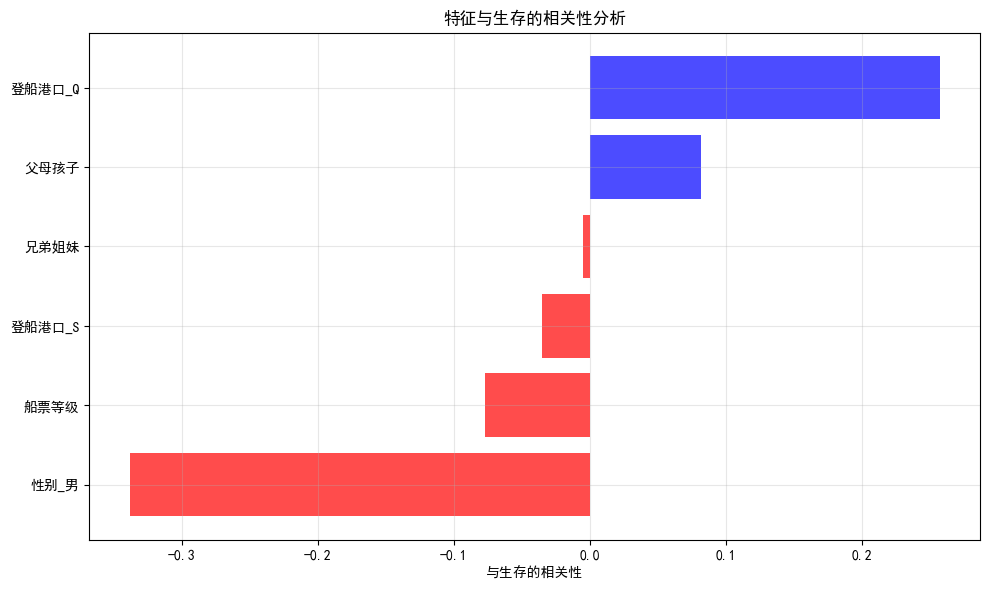


💡 观察：哪些特征与生存正相关（蓝色）？哪些负相关（红色）？
   正相关：特征值越大，生存概率越高
   负相关：特征值越大，生存概率越低


In [5]:
# 先查看一下数据的整体信息
print("🔍 数据探索:")
print(f"总乘客数: {len(df_titanic)}")
print(f"幸存人数: {df_titanic['Survived'].sum()}")
print(f"幸存率: {df_titanic['Survived'].mean()*100:.1f}%")

# 绘制特征相关性图
print("\n📊 绘制特征重要性图...")
plot_feature_importance(df_titanic)

print("\n💡 观察：哪些特征与生存正相关（蓝色）？哪些负相关（红色）？")
print("   正相关：特征值越大，生存概率越高")
print("   负相关：特征值越大，生存概率越低")

## 第五步：数据预处理 - 整理和清洗数据

### 5.1 看看我们要预测什么

首先，我们看看有多少人幸存，多少人没有幸存。

In [6]:
# 统计生存情况
print("🎯 生存情况统计（这是我们想要预测的目标）:")
survival_counts = df_titanic.Survived.value_counts()
print(survival_counts)
print(f"\n幸存率: {survival_counts[1] / len(df_titanic) * 100:.1f}%")

# 处理缺失值 - 就像补全问卷中没填的部分
# 有些乘客的年龄信息缺失了，我们用0来填充
df_titanic['Age'] = df_titanic['Age'].fillna(0)
print(f"\n🔧 年龄缺失值处理完成！")
print(f"现在年龄列的缺失值数量: {df_titanic['Age'].isnull().sum()} ← 应该是0")

# 小知识：在真实项目中，我们可能会用平均年龄来填充，但这里为了简单就用0了

🎯 生存情况统计（这是我们想要预测的目标）:
Survived
0    549
1    342
Name: count, dtype: int64

幸存率: 38.4%

🔧 年龄缺失值处理完成！
现在年龄列的缺失值数量: 0 ← 应该是0


### 5.2 把文字变成数字 - 编码分类变量

计算机不理解"男"、"女"这样的文字，只理解数字。所以我们要把文字转换成数字。

In [7]:
print("🔤 正在把文字特征转换为数字...")

# 对性别进行one-hot编码（独热编码）
# 什么是one-hot编码？就是把"男"变成[1,0]，"女"变成[0,1]
print("处理性别特征:")
sex_dummies = pd.get_dummies(df_titanic['Sex'], prefix="Sex")
print(sex_dummies.head())  # 看看转换后的样子

# 对登船港口进行同样的处理
print("\n处理登船港口特征:")
embarked_dummies = pd.get_dummies(df_titanic['Embarked'], prefix="Em")
print(embarked_dummies.head())

# 把转换后的新特征添加到原数据中
print("\n📥 将新特征合并到数据集中...")
df_titanic = pd.concat([df_titanic, sex_dummies, embarked_dummies], axis=1)

# 删除原来的文字列（因为我们已经有了数字版本）
df_titanic = df_titanic.drop(columns=['Sex', 'Embarked'])

print("✅ 类别特征编码完成！")
print(f"现在数据集有 {df_titanic.shape[1]} 个特征")
print("\n新的数据集预览:")
df_titanic.head()

🔤 正在把文字特征转换为数字...
处理性别特征:
   Sex_female  Sex_male
0       False      True
1        True     False
2        True     False
3        True     False
4       False      True

处理登船港口特征:
    Em_C   Em_Q   Em_S
0  False  False   True
1   True  False  False
2  False  False   True
3  False  False   True
4  False  False   True

📥 将新特征合并到数据集中...
✅ 类别特征编码完成！
现在数据集有 15 个特征

新的数据集预览:


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Em_C,Em_Q,Em_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True


## 第六步：准备训练数据 - 分开特征和标签

现在我们要把数据分成两部分：
- **特征（X）**: 用来预测的信息（年龄、性别等）
- **标签（y）**: 我们要预测的目标（是否幸存）

In [8]:
# 构建特征集 X - 所有用来预测的信息
# 我们移除一些不相关或太复杂的特征
X = df_titanic.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

# 构建标签集 y - 我们要预测的目标（是否幸存）
y = df_titanic.Survived.values

# 调整y的形状，让计算机更容易处理
y = y.reshape(-1, 1)  # -1表示自动计算合适的行数

print("🎯 数据准备完成:")
print(f"特征集 X 形状: {X.shape} ← 有{X.shape[0]}个乘客，{X.shape[1]}个特征")
print(f"标签集 y 形状: {y.shape} ← 有{y.shape[0]}个标签")
print(f"\n使用的特征列表: {list(X.columns)}")

# 思考：为什么我们要移除'Name', 'Ticket', 'Cabin'这些列？
# 提示：这些信息太具体或者缺失太多，对预测帮助不大

🎯 数据准备完成:
特征集 X 形状: (891, 11) ← 有891个乘客，11个特征
标签集 y 形状: (891, 1) ← 有891个标签

使用的特征列表: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Em_C', 'Em_Q', 'Em_S']


## 第七步：分割数据集 - 创建练习册和考试卷

我们要把数据分成两部分：
- **训练集**: 用来教模型学习（就像练习题）
- **测试集**: 用来检验模型学得怎么样（就像考试题）

In [9]:
# 分割数据集：80%用于训练，20%用于测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✂️ 数据集分割完成:")
print(f"训练集 - 特征: {X_train.shape}, 标签: {y_train.shape} ← 用来教模型学习")
print(f"测试集 - 特征: {X_test.shape}, 标签: {y_test.shape} ← 用来测试模型效果")
print(f"\n训练集占比: {X_train.shape[0] / len(X) * 100:.1f}%")
print(f"测试集占比: {X_test.shape[0] / len(X) * 100:.1f}%")

# 小知识：为什么不能都用同样的数据来训练和测试？
# 因为那样模型就"作弊"了，它已经见过所有题目的答案！

✂️ 数据集分割完成:
训练集 - 特征: (712, 11), 标签: (712, 1) ← 用来教模型学习
测试集 - 特征: (179, 11), 标签: (179, 1) ← 用来测试模型效果

训练集占比: 79.9%
测试集占比: 20.1%


## 第八步：数据标准化 - 让所有特征在同一个尺度上

想象一下，年龄是0-100，票价是0-500，这就像用厘米和米同时测量身高！
我们需要把所有的特征都调整到相似的尺度上。

In [10]:
# 创建标准化器 - 就像一个智能尺子
scaler = StandardScaler()

print("📏 开始数据标准化...")
print("标准化前:")
print(f"  年龄范围: {X_train['Age'].min():.1f} ~ {X_train['Age'].max():.1f}")
print(f"  票价范围: {X_train['Fare'].min():.1f} ~ {X_train['Fare'].max():.1f}")

# 对训练集进行拟合和转换（计算均值和标准差，然后转换）
X_train_scaled = scaler.fit_transform(X_train)

# 对测试集进行转换（使用训练集的参数，避免"偷看"测试集）
X_test_scaled = scaler.transform(X_test)

print("\n标准化后:")
print(f"  训练集 - 均值: {X_train_scaled.mean():.4f}, 标准差: {X_train_scaled.std():.4f}")
print(f"  测试集 - 均值: {X_test_scaled.mean():.4f}, 标准差: {X_test_scaled.std():.4f}")
print("\n✅ 数据标准化完成！现在所有特征都在相似的尺度上了")

# 标准化后的数据均值为0，标准差为1，这样模型学习起来更容易

📏 开始数据标准化...
标准化前:
  年龄范围: 0.0 ~ 80.0
  票价范围: 0.0 ~ 512.3

标准化后:
  训练集 - 均值: 0.0000, 标准差: 1.0000
  测试集 - 均值: -0.0228, 标准差: 1.0034

✅ 数据标准化完成！现在所有特征都在相似的尺度上了


## 第九步：转换为PyTorch张量 - 准备模型能吃的"食物"

PyTorch使用一种叫做"张量"的数据结构，就像NumPy数组的升级版。

In [11]:
print("🔥 正在将数据转换为PyTorch张量...")

# 将数据转换为PyTorch张量
# FloatTensor表示浮点数张量，因为我们的数据有小数
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test)

print("📊 张量信息:")
print(f"训练特征张量: {X_train_tensor.shape} ← 形状")
print(f"训练标签张量: {y_train_tensor.shape}")
print(f"测试特征张量: {X_test_tensor.shape}")
print(f"测试标签张量: {y_test_tensor.shape}")

# 创建数据加载器 - 就像给模型准备小份的食物
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# batch_size=64 表示每次给模型64个样本学习
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print("\n✅ 数据加载器创建完成!")
print(f"每个批次包含64个样本")
print(f"总共有 {len(train_loader)} 个训练批次")
print(f"总共有 {len(test_loader)} 个测试批次")

# 为什么要分批次？因为一次处理所有数据太慢了，分批次可以加快学习速度

🔥 正在将数据转换为PyTorch张量...
📊 张量信息:
训练特征张量: torch.Size([712, 11]) ← 形状
训练标签张量: torch.Size([712, 1])
测试特征张量: torch.Size([179, 11])
测试标签张量: torch.Size([179, 1])

✅ 数据加载器创建完成!
每个批次包含64个样本
总共有 12 个训练批次
总共有 3 个测试批次


## 第十步：构建神经网络模型 - 创建我们的人工"大脑"

现在我们要构建一个神经网络，它就像一个有多个层次的大脑：
- 输入层：接收数据
- 隐藏层：处理信息
- 输出层：给出答案

<div style="color: #FF0000; font-size: 18px; font-weight: bold; background-color: #FFF0F0; padding: 10px; border: 2px solid #FF0000; border-radius: 5px;"> 考试任务：修改下面TitanicNN(nn.Module)里self.network的网络模型配置(例如修改神经网络的层数或者增加神经元个数等)，然后执行第十一步，使其验证准确率超过84% </div>

In [57]:
# 定义我们的神经网络类
class TitanicNN(nn.Module):
    def __init__(self, input_size):
        """初始化神经网络
        input_size: 输入特征的个数
        """
        super(TitanicNN, self).__init__()
        
        # 创建神经网络层 - 就像搭建乐高积木
        self.network = nn.Sequential(
            # 第一层：输入层 → 隐藏层（12个神经元）
            nn.Linear(input_size, 12),  # Linear是全连接层
            nn.ReLU(),                  # ReLU是激活函数，让网络能学习复杂模式
            
            # 第二层：12个神经元 → 24个神经元
            # nn.Linear(12, 24),
            nn.Linear(12, 256),     # todo: 增加神经元个数，大力出奇迹
            nn.ReLU(),

            # 输出层：24个神经元 → 1个神经元（生存概率）
            # nn.Linear(24, 1),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Sigmoid把输出变成0-1之间的概率
        )
    
    def forward(self, x):
        """定义数据如何通过网络传播"""
        return self.network(x)

# 创建模型实例
input_size = X_train_tensor.shape[1]  # 输入特征的数量
model = TitanicNN(input_size)

# 定义损失函数 - 用来衡量模型预测的好坏
# BCELoss = Binary Cross Entropy Loss，适合二分类问题
criterion = nn.BCELoss()

# 定义优化器 - 用来调整模型参数，让模型变得更好
# RMSprop是一种智能的学习方法
optimizer = optim.RMSprop(model.parameters(), lr=0.001)  # lr是学习率

print("🧠 神经网络模型构建完成！")
print(f"输入特征数量: {input_size}")
print(f"学习率: 0.001")
print(f"\n模型结构:")
print(model)

🧠 神经网络模型构建完成！
输入特征数量: 11
学习率: 0.001

模型结构:
TitanicNN(
  (network): Sequential(
    (0): Linear(in_features=11, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


## 第十一步：训练模型 - 开始教我们的"大脑"学习！

这是最激动人心的部分！我们要开始训练模型了。

训练过程就像：
1. 给模型看一些数据（前向传播）
2. 检查它猜得对不对（计算损失）
3. 告诉它怎么改进（反向传播）
4. 重复很多次

In [62]:
# 设置训练轮次
epochs = 100  # 整个数据集要学习100遍

# 创建列表来记录训练过程
train_losses = []      # 记录训练损失
val_losses = []        # 记录验证损失
train_accuracies = []  # 记录训练准确率
val_accuracies = []    # 记录验证准确率

print("🚀 开始训练模型...")
print("=" * 50)

for epoch in range(epochs):
    # === 训练阶段 ===
    model.train()  # 设置为训练模式
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    
    # 遍历每个批次
    for batch_X, batch_y in train_loader:
        # 前向传播：让模型做预测
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # 反向传播：计算梯度
        optimizer.zero_grad()  # 清空之前的梯度
        loss.backward()        # 计算新梯度
        optimizer.step()       # 更新模型参数
        
        # 统计信息
        train_loss += loss.item()
        
        # 计算准确率
        predicted = (outputs > 0.5).float()  # 概率>0.5预测为幸存
        train_total += batch_y.size(0)
        train_correct += (predicted == batch_y).sum().item()
    
    # === 验证阶段 ===
    model.eval()  # 设置为评估模式
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():  # 验证时不计算梯度，节省内存
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()
            
            predicted = (outputs > 0.5).float()
            val_total += batch_y.size(0)
            val_correct += (predicted == batch_y).sum().item()
    
    # 计算平均损失和准确率
    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(test_loader)
    train_accuracy = 100 * train_correct / train_total
    val_accuracy = 100 * val_correct / val_total
    
    # 记录结果
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    # 每5轮打印一次进度
    if (epoch + 1) % 5 == 0:
        print(f'第 {epoch+1:2d}/{epochs} 轮 | ' \
              f'训练损失: {avg_train_loss:.4f} | ' \
              f'验证损失: {avg_val_loss:.4f} | ' \
              f'训练准确率: {train_accuracy:6.2f}% | ' \
              f'验证准确率: {val_accuracy:6.2f}%')

print("=" * 50)
print("✅ 模型训练完成！")
print(f"最终验证准确率: {val_accuracies[-1]:.2f}%")

# 观察：训练准确率和验证准确率哪个更高？为什么？

🚀 开始训练模型...
第  5/100 轮 | 训练损失: 0.2913 | 验证损失: 0.5478 | 训练准确率:  89.19% | 验证准确率:  82.68%
第 10/100 轮 | 训练损失: 0.2513 | 验证损失: 0.5533 | 训练准确率:  89.89% | 验证准确率:  84.36%
第 15/100 轮 | 训练损失: 0.2622 | 验证损失: 0.5457 | 训练准确率:  89.61% | 验证准确率:  86.03%
第 20/100 轮 | 训练损失: 0.2521 | 验证损失: 0.5604 | 训练准确率:  89.75% | 验证准确率:  84.92%
第 25/100 轮 | 训练损失: 0.2475 | 验证损失: 0.5561 | 训练准确率:  89.89% | 验证准确率:  83.24%
第 30/100 轮 | 训练损失: 0.2423 | 验证损失: 0.5639 | 训练准确率:  90.31% | 验证准确率:  84.36%
第 35/100 轮 | 训练损失: 0.2529 | 验证损失: 0.5706 | 训练准确率:  90.31% | 验证准确率:  84.36%
第 40/100 轮 | 训练损失: 0.2651 | 验证损失: 0.5662 | 训练准确率:  90.31% | 验证准确率:  84.36%
第 45/100 轮 | 训练损失: 0.2418 | 验证损失: 0.5652 | 训练准确率:  90.03% | 验证准确率:  86.59%
第 50/100 轮 | 训练损失: 0.2408 | 验证损失: 0.5676 | 训练准确率:  89.89% | 验证准确率:  83.24%
第 55/100 轮 | 训练损失: 0.2451 | 验证损失: 0.5774 | 训练准确率:  90.45% | 验证准确率:  83.80%
第 60/100 轮 | 训练损失: 0.2537 | 验证损失: 0.5742 | 训练准确率:  89.89% | 验证准确率:  84.92%
第 65/100 轮 | 训练损失: 0.2340 | 验证损失: 0.5704 | 训练准确率:  90.17% | 验证准确率:  84.36%
第 70/100 轮 | 

## 第十二步：评估模型 - 看看我们的"大脑"学得怎么样

现在让我们可视化训练过程，并详细评估模型性能。

📈 训练过程可视化:


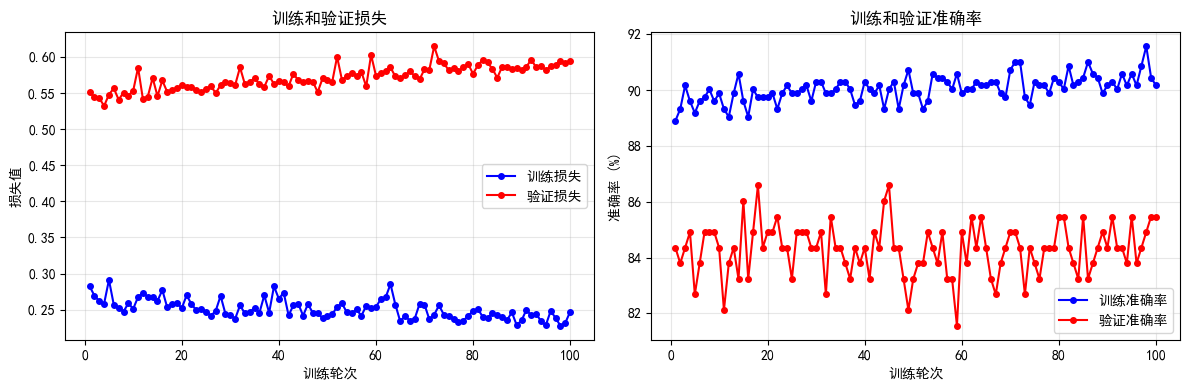


🧪 神经网络模型详细评估:
📋 分类报告:
              precision    recall  f1-score   support

         未幸存       0.86      0.90      0.88       105
          幸存       0.84      0.80      0.82        74

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179

总体准确率: 85.47%


In [63]:
# 显示训练历史图表
print("📈 训练过程可视化:")
show_history(train_losses, val_losses, train_accuracies, val_accuracies)

# 在测试集上进行最终预测
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = test_outputs.numpy()

# 显示详细的分类报告
print("\n🧪 神经网络模型详细评估:")
show_report(y_test, test_predictions)

# 分析图表：
# - 损失曲线应该逐渐下降
# - 准确率曲线应该逐渐上升
# - 如果训练准确率远高于验证准确率，可能过拟合了

## 第十三步：与传统方法对比 - 看看深度学习的优势

让我们用传统的逻辑回归模型来对比，看看神经网络是否真的更好。

In [64]:
from sklearn.linear_model import LogisticRegression

print("🔬 与传统机器学习方法对比...")

# 训练逻辑回归模型（传统方法）
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train.ravel())  # ravel()把y从二维变一维

# 计算逻辑回归的准确率
lr_accuracy = lr_model.score(X_test_scaled, y_test) * 100
print(f"📊 逻辑回归测试准确率: {lr_accuracy:.2f}%")

# 获取神经网络的最终准确率
nn_accuracy = val_accuracies[-1]
print(f"🧠 神经网络测试准确率: {nn_accuracy:.2f}%")

# 对比结果
difference = nn_accuracy - lr_accuracy
print(f"\n🏆 性能对比:")
if difference > 0:
    print(f"神经网络比逻辑回归准确率高了 {difference:.2f}%! 🎉")
elif difference < 0:
    print(f"逻辑回归比神经网络准确率高了 {abs(difference):.2f}%")
else:
    print("两种方法准确率相同")

# 思考：为什么神经网络可能比逻辑回归表现更好？
# 提示：神经网络能学习更复杂的模式

🔬 与传统机器学习方法对比...
📊 逻辑回归测试准确率: 77.65%
🧠 神经网络测试准确率: 85.47%

🏆 性能对比:
神经网络比逻辑回归准确率高了 7.82%! 🎉


## 第十四步：保存模型 - 把学到的知识存起来

训练好的模型很宝贵，我们要把它保存下来，以后可以直接使用。

In [65]:
# 保存模型和相关信息
torch.save({
    'model_state_dict': model.state_dict(),      # 模型参数
    'optimizer_state_dict': optimizer.state_dict(),  # 优化器状态
    'scaler': scaler,                            # 数据标准化器
    'input_size': input_size                     # 输入特征数量
}, 'titanic_pytorch_model.pth')

print("💾 模型已保存为 'titanic_pytorch_model.pth'")
print("\n🎉 项目完成！")
print("=" * 50)
print("🌟 总结：")
print("✓ 我们学会了如何处理和清洗数据")
print("✓ 我们构建了一个神经网络模型")
print("✓ 我们训练并评估了模型")
print("✓ 我们对比了不同方法的性能")
print("✓ 我们保存了训练好的模型")
print("\n🔮 下一步可以尝试：")
print("- 调整网络结构（增加或减少层数）")
print("- 改变学习率")
print("- 尝试不同的优化器")
print("- 添加更多特征")
print("=" * 50)

💾 模型已保存为 'titanic_pytorch_model.pth'

🎉 项目完成！
🌟 总结：
✓ 我们学会了如何处理和清洗数据
✓ 我们构建了一个神经网络模型
✓ 我们训练并评估了模型
✓ 我们对比了不同方法的性能
✓ 我们保存了训练好的模型

🔮 下一步可以尝试：
- 调整网络结构（增加或减少层数）
- 改变学习率
- 尝试不同的优化器
- 添加更多特征
